In [ ]:
!pip install -q keras

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils #???
from keras import backend as K
from keras.optimizers import Adam

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG # ????
from keras.utils.vis_utils import model_to_dot 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))


Using Keras version: 2.3.1 backend: tensorflow


In [5]:
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

IndexError: list index out of range

In [ ]:
from google.colab import files # to load image data
uploaded = files.upload()

Saving Data.zip to Data.zip


In [ ]:
!unzip Data.zip # 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_gen = ImageDataGenerator() # to convert images in a directory to a dataset 
train_set = dataset_gen.flow_from_directory('Data/train/',
                                            class_mode='binary',
                                            target_size=(150, 150), 
                                            batch_size=32)
eval_set = dataset_gen.flow_from_directory('Data/eval/', class_mode='binary',
                                           target_size=(150, 150), 
                                           batch_size=32)
test_set = dataset_gen.flow_from_directory('Data/test/', class_mode='binary',
                                           target_size=(150, 150), 
                                           batch_size=32)

Found 10000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
print("Train set includes:", len(train_set), "batches")
print("Eval set includes:", len(eval_set), "batches")
print("Test set includes:", len(test_set), "batches")

Train set includes: 313 batches
Eval set includes: 125 batches
Test set includes: 32 batches


In [ ]:
input_shape = train_set[0][0].shape[1:4] # shape of inputs for CNN model

In [ ]:
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

In [ ]:
def define_model(): # CNN image classifier model as function

  model = Sequential()

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(MaxPooling2D(pool_size=pool_size))
  #model.add(Dropout(0.25))

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(MaxPooling2D(pool_size=pool_size))
  #model.add(Dropout(0.25))

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(MaxPooling2D(pool_size=pool_size))
  #model.add(Dropout(0.25))

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid'))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(MaxPooling2D(pool_size=pool_size))
  #model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model
#print(model.summary())


In [ ]:
model = define_model() 
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
activation_51 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization_96 (Batc (None, 148, 148, 32)      592       
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_52 (Activation)   (None, 146, 146, 32)      0         
_________________________________________________________________
batch_normalization_97 (Batc (None, 146, 146, 32)      584       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 73, 73, 32)      

In [ ]:
%%time

epochs = 10 

#fitting train data to CNN model
history = model.fit_generator(train_set,steps_per_epoch=len(train_set), 
                              epochs=epochs, validation_data=eval_set, 
                              validation_steps=len(eval_set))

Epoch 1/10
313/313 [==============================] - 45s 143ms/step - loss: 0.6976 - accuracy: 0.5645 - val_loss: 0.6602 - val_accuracy: 0.5947
Epoch 2/10
313/313 [==============================] - 44s 142ms/step - loss: 0.6473 - accuracy: 0.6135 - val_loss: 0.6553 - val_accuracy: 0.6283
Epoch 3/10
313/313 [==============================] - 44s 140ms/step - loss: 0.6145 - accuracy: 0.6609 - val_loss: 0.5486 - val_accuracy: 0.7247
Epoch 4/10
313/313 [==============================] - 44s 140ms/step - loss: 0.5740 - accuracy: 0.7075 - val_loss: 0.5220 - val_accuracy: 0.7327
Epoch 5/10
313/313 [==============================] - 44s 140ms/step - loss: 0.5299 - accuracy: 0.7390 - val_loss: 0.5002 - val_accuracy: 0.7558
Epoch 6/10
313/313 [==============================] - 44s 141ms/step - loss: 0.5000 - accuracy: 0.7622 - val_loss: 0.4870 - val_accuracy: 0.7717
Epoch 7/10
313/313 [==============================] - 45s 143ms/step - loss: 0.4678 - accuracy: 0.7856 - val_loss: 0.4776 - val_ac

Text(0.5, 1.0, 'accuracy')

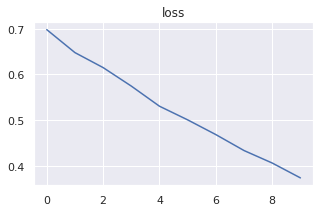

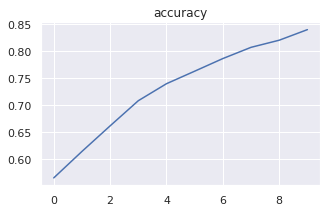

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy')

In [ ]:
%%time
scores = model.evaluate(test_set, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

32/32 - 3s - loss: 0.4015 - accuracy: 0.7950
accuracy: 79.50%
CPU times: user 3.12 s, sys: 123 ms, total: 3.25 s
Wall time: 3.01 s


**CNN Model with Image Augmentation**

In [ ]:
# The best results obtained with below features, the result whisch is 78%
train_data_gen = ImageDataGenerator(shear_range=0.2,
                  zoom_range=0.2,rescale=1.0/255, horizontal_flip= True) 

scaled_data_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
aug_train_set = train_data_gen.flow_from_directory('Data/train/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary', 
                                                   batch_size=32)
aug_eval_set = scaled_data_gen.flow_from_directory('Data/eval/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary',
                                                   batch_size=32)
aug_test_set = scaled_data_gen.flow_from_directory('Data/test/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary', 
                                                   batch_size=32)

Found 10000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
input_shape = aug_train_set[0][0].shape[1:4]
input_shape

(150, 150, 3)

In [ ]:
model_aug = define_model()

In [ ]:
%%time

epochs = 10 

history = model_aug.fit_generator(aug_train_set,
                                  steps_per_epoch=len(aug_train_set), 
                                  epochs=epochs, validation_data=aug_eval_set, 
                                  validation_steps=len(aug_eval_set))

Epoch 1/10
313/313 [==============================] - 88s 280ms/step - loss: 0.7056 - accuracy: 0.5228 - val_loss: 0.6868 - val_accuracy: 0.5592
Epoch 2/10
313/313 [==============================] - 87s 279ms/step - loss: 0.6895 - accuracy: 0.5248 - val_loss: 0.6792 - val_accuracy: 0.5727
Epoch 3/10
313/313 [==============================] - 87s 278ms/step - loss: 0.6849 - accuracy: 0.5484 - val_loss: 0.6746 - val_accuracy: 0.5863
Epoch 4/10
313/313 [==============================] - 88s 281ms/step - loss: 0.6731 - accuracy: 0.5793 - val_loss: 0.6522 - val_accuracy: 0.6298
Epoch 5/10
313/313 [==============================] - 89s 285ms/step - loss: 0.6526 - accuracy: 0.6240 - val_loss: 0.7032 - val_accuracy: 0.5792
Epoch 6/10
313/313 [==============================] - 88s 282ms/step - loss: 0.6295 - accuracy: 0.6580 - val_loss: 0.6116 - val_accuracy: 0.6680
Epoch 7/10
313/313 [==============================] - 89s 284ms/step - loss: 0.5971 - accuracy: 0.6825 - val_loss: 0.5504 - val_ac

Text(0.5, 1.0, 'accuracy')

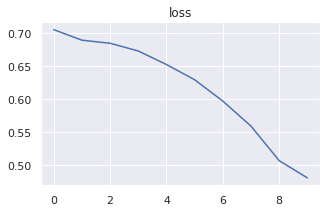

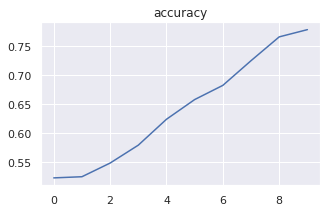

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy')

In [ ]:
%%time
scores = model_aug.evaluate(aug_test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

32/32 [==============================] - 3s 89ms/step - loss: 0.4426 - accuracy: 0.7870
accuracy: 78.70%
CPU times: user 3.18 s, sys: 102 ms, total: 3.28 s
Wall time: 3.08 s


## Evaluation of base model and augmented version model

**The test accuracy of the base-model is 79%, on the other hand the test accuracy of augmented version is 78%.** Augmentation is generally done to obtain better accuracy results, but it seems it did not work in that way in our case. Maybe with different image augmentation methods, better results can be obtained. In order to get mentioned better results, more trials should be done.

On the other side, the CNN model worked well and almost 80% accuracy attained with both datasets. To improve accuracy, dropout layers were canceled due to fact that overftting was not the trouble. 

The whole task is done in Google Colab because my computer has no enough capabilities to carry out a high-level CPU needed DL training algorithm.